# Computer Vision Nanodegree

## Project: Image Captioning

---

The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.  The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.  

![Sample Dog Output](images/coco-examples.jpg)

You can read more about the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).

In this notebook, you will explore this dataset, in preparation for the project.

## Step 1: Initialize the COCO API

We begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that you will use to obtain the data.

In [1]:
import os
if not os.path.exists('/opt/cocoapi'):
    os.mkdir('/opt/cocoapi')
if not os.path.exists('/opt/cocoapi/annotations'):
    os.mkdir('/opt/cocoapi/annotations')
!pip install pycocotools

  Running setup.py bdist_wheel for pycocotools ... done
  Stored in directory: /root/.cache/pip/wheels/86/19/08/49b25f258ead1f861c9ab2fc41f73636f2928859adbb0e9797
Successfully built pycocotools


In [2]:
# !mkdir /data
!wget -P /opt/cocoapi/annotations/ http://images.cocodataset.org/annotations/annotations_trainval2014.zip
!unzip -n /opt/cocoapi/annotations/annotations_trainval2014.zip -d /opt/cocoapi/

--2020-08-06 21:47:59--  http://images.cocodataset.org/annotations/annotations_trainval2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.241.100
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.241.100|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252872794 (241M) [application/zip]
Saving to: ‘/opt/cocoapi/annotations/annotations_trainval2014.zip’

annotations_trainva 100%[===================>] 241.16M  81.7MB/s    in 3.0s    

2020-08-06 21:48:02 (81.7 MB/s) - ‘/opt/cocoapi/annotations/annotations_trainval2014.zip’ saved [252872794/252872794]

Archive:  /opt/cocoapi/annotations/annotations_trainval2014.zip


In [3]:
!wget -P /opt/cocoapi/annotations/ http://images.cocodataset.org/annotations/image_info_test2014.zip
!unzip -n /opt/cocoapi/annotations/image_info_test2014.zip -d /opt/cocoapi/

--2020-07-24 04:49:43--  http://images.cocodataset.org/annotations/image_info_test2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.114.147
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.114.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 763464 (746K) [application/zip]
Saving to: ‘/opt/cocoapi/annotations/image_info_test2014.zip.1’

image_info_test2014 100%[===================>] 745.57K  4.46MB/s    in 0.2s    

2020-07-24 04:49:43 (4.46 MB/s) - ‘/opt/cocoapi/annotations/image_info_test2014.zip.1’ saved [763464/763464]

Archive:  /opt/cocoapi/annotations/image_info_test2014.zip


In [4]:
# !wget -P /opt/cocoapi/images/ http://images.cocodataset.org/zips/train2014.zip
# !unzip -n /opt/cocoapi/images/train2014.zip -d /opt/cocoapi/images/

In [5]:
# !wget -P /opt/cocoapi/images/ http://images.cocodataset.org/zips/val2014.zip
# !unzip -n /opt/cocoapi/images/val2014.zip -d /opt/cocoapi/images/

In [6]:
# !wget -P /opt/cocoapi/images/ http://images.cocodataset.org/zips/train2014.zip
# !unzip -n /opt/cocoapi/images/train2014.zip -d /opt/cocoapi/images/

In [1]:
import os
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
dataDir = '/opt/cocoapi'
dataType = 'val2014'

instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)


# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=6.32s)
creating index...
index created!
loading annotations into memory...
Done (t=0.48s)
creating index...
index created!


## Step 2: Plot a Sample Image

Next, we plot a random image from the dataset, along with its five corresponding captions.  Each time you run the code cell below, a different image is selected.  

In the project, you will use this dataset to train your own model to generate captions from images!

http://images.cocodataset.org/val2014/COCO_val2014_000000156195.jpg


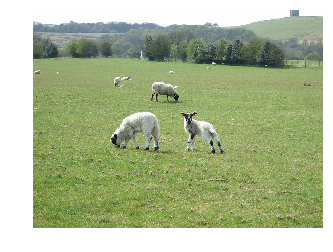

Sheep graze in a large field with trees behind them.
a bunch of sheep standing around a field eating grass and looking around 
Goats are standing near each other in the grass.
Many sheep are scattered around the field of short grass.
An open field with multiple sheep grazing about it.


In [2]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

## Step 3: What's to Come!

In this project, you will use the dataset of image-caption pairs to train a CNN-RNN model to automatically generate images from captions.  You'll learn more about how to design the architecture in the next notebook in the sequence (**1_Preliminaries.ipynb**).

![Image Captioning CNN-RNN model](images/encoder-decoder.png)